# Исследование объявлений о продаже квартир

**Цель исследования**

Необходимо выявить основные параметры и факторы, влияющие на рыночную цену квартиры. Это позволит
отследить аномалии и мошенническую деятельность при автоматизации процесса оценки.

**Входные данные**

Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет (файл `real_estate.csv`).


**Ход исследования**

О качестве данных ничего не известно, кроме того, что одна часть информации была указана пользователями самостоятельно, другая - получена автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма).

Мы проверим данные на ошибки и оценим их влияние на исследование; затем, на этапе предобработки поищем возможность исправить самые критичные ошибки.
Далее проведем расчеты, на основании которых проанализируем данные и выявим параметры, влияющие на ценообразование квартиры.

Таким образом, исследование пройдёт в четыре этапа:

*    Обзор данных;
*    Предобработка данных;
*    Расчеты;
*    Исследовательский анализ данных;


## Обзор данных

In [174]:
# импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# чтение файла с данными и сохранение в df

try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv(r'C:\Users\Кирилл\.spyder-py3\real_estate_data.csv', sep='\t')

In [5]:
# выводим на просмотр 10 случайных строк таблицы

pd.set_option('display.max_columns', None)
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18189,9,2560000.0,24.0,2016-04-15T00:00:00,1,NaN,16.0,14.90,15,NaN,False,False,5.00,1.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,88.0
640,10,3900000.0,39.0,2018-04-06T00:00:00,1,2.50,9.0,17.00,9,NaN,False,False,6.00,2.0,Санкт-Петербург,48100.0,16081.0,0.0,NaN,0.0,NaN,17.0
17113,11,8900000.0,70.0,2018-02-21T00:00:00,2,2.80,16.0,34.00,13,False,False,False,14.00,2.0,Санкт-Петербург,46411.0,15247.0,1.0,672.0,0.0,NaN,127.0
1831,10,3850000.0,41.0,2017-09-09T00:00:00,1,NaN,4.0,16.00,4,NaN,False,False,12.00,2.0,Сестрорецк,54050.0,35150.0,0.0,NaN,0.0,NaN,7.0
12916,6,39990000.0,67.7,2015-06-25T00:00:00,3,3.10,7.0,42.90,6,NaN,False,False,9.00,NaN,Санкт-Петербург,25685.0,2136.0,1.0,72.0,3.0,202.0,NaN
14648,8,4300000.0,44.6,2018-10-09T00:00:00,2,2.55,9.0,27.50,1,NaN,False,False,7.20,NaN,Санкт-Петербург,17153.0,12639.0,0.0,NaN,0.0,NaN,34.0
17222,7,5980000.0,64.5,2019-03-07T00:00:00,3,NaN,9.0,39.90,7,False,False,False,9.60,2.0,Санкт-Петербург,15972.0,17224.0,0.0,NaN,0.0,NaN,NaN
15189,0,4200000.0,61.7,2015-07-04T00:00:00,2,2.60,9.0,36.04,1,NaN,False,False,10.73,0.0,поселок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,469.0
19689,9,6300000.0,46.6,2018-10-12T00:00:00,1,2.80,5.0,16.80,2,NaN,False,False,19.70,4.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,4.0
11842,11,1450000.0,30.0,2017-05-18T00:00:00,1,2.50,5.0,16.00,5,NaN,False,False,7.00,1.0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,216.0


In [6]:
# получение общей информации о данных в таблице df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице двадцать два столбца; количество значений в столбцах различается, что говорит о пропусках значений. Так же есть нарушения в стилистике в наименованиях столбцов.   

Согласно документации к данным:

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)	
`balcony` — число балконов	
`ceiling_height` — высота потолков (м)	
`cityCenters_nearest` — расстояние до центра города (м)	
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)	
`first_day_exposition` — дата публикации	
`floor` — этаж	
`floors_total` — всего этажей в доме	
`is_apartment` — апартаменты (булев тип)	
`kitchen_area` — площадь кухни в квадратных метрах (м²)	
`last_price` — цена на момент снятия с публикации	
`living_area` — жилая площадь в квадратных метрах (м²)	
`locality_name` — название населённого пункта	
`open_plan` — свободная планировка (булев тип)	
`parks_around3000` — число парков в радиусе 3 км	
`parks_nearest` — расстояние до ближайшего парка (м)	
`ponds_around3000` — число водоёмов в радиусе 3 км	
`ponds_nearest` — расстояние до ближайшего водоёма (м)	
`rooms` — число комнат	
`studio` — квартира-студия (булев тип)	
`total_area` — площадь квартиры в квадратных метрах (м²)	
`total_images` — число фотографий квартиры в объявлении	


In [7]:
# получение общей информации о количественных данных в таблице df

df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Виден большой разброс в данных, часть данных вызывает вопросы (например, высота потолка - 100м или жилой дом из 60-ти этажей в окрестностях Питера).

### Вывод


В каждой строке таблицы — данные об объявлении о продаже квартиры. 
Предварительно можно утверждать, что информации достаточно: параметров много, есть из чего выбрать.

При этом заметны пропуски в данных, видны артефакты, возможны дубликаты, и, скорее всего, потребуется изменение формата в колонках для удобства. Так же, таблица достаточно большая, необходимо категоризировать ее и укрупнить данные для бОльшей наглядности.

Приступаем к предобработке данных.

## Предобработка данных

Для начала приведем наименования столбцов к единому стилю.

In [10]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                        'parks_around3000': 'parks_around_3000', 
                        'ponds_around3000': 'ponds_around_3000',
                        'studio': 'is_studio',
                        'open_plan': 'is_open_plan'
                       })
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### `locality_name`

In [11]:
df['locality_name'].value_counts()

locality_name
Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: count, Length: 364, dtype: int64

Проверим строки, где не указан населенный пункт.

In [12]:
df[df.locality_name.isnull()].head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,False,False,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,False,False,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,False,False,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,False,False,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,False,False,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


Протяжённость Петербурга в административных границах: с севера на юг в пределах КАД — 32 км (за пределами КАД — 52 км), с северо-запада на юго-восток за пределами КАД, — около 90 км. 

In [14]:
df['locality_name'].isnull().sum()

49

In [15]:
df.loc[df['city_centers_nearest'] < 18000, 'locality_name'].fillna('Санкт-Петербург')

df= df.dropna(subset=['locality_name'])    # удаляем остальное без названия

df['locality_name'] = df['locality_name'].str.replace('ё', 'е')   # меняем посёлок на поселок (неявные дубликаты)

df['locality_name'].value_counts()

locality_name
Санкт-Петербург                     15721
поселок Мурино                        556
поселок Шушары                        440
Всеволожск                            398
Пушкин                                369
                                    ...  
поселок Левашово                        1
садовое товарищество Новая Ропша        1
деревня Шпаньково                       1
деревня Курковицы                       1
поселок Дзержинского                    1
Name: count, Length: 330, dtype: int64

Напишем две функции:
- первая поможет нам детальнее изучить информацию в количественных столбцах;
- вторая - нарисовать гистограмму.

In [17]:
def describe_all(data, column):
    skip = data[column].isna().sum()
    types = data.dtypes[column]
    details = data[column].describe().round(2)
    print('Количество пропусков:', skip)
    print('Тип данных:', types)
    print('Детали:', details)


def build_hist(data, xname, title):
    plt.figure(figsize=(10,3))
    data.hist()
    plt.xlabel(xname)
    plt.title(title)
    plt.ticklabel_format(style='plain') # убираем scientific notation
    plt.show()

### `total_images`

Количество пропусков: 0
Тип данных: int64
Детали: count    23650.00
mean         9.86
std          5.68
min          0.00
25%          6.00
50%          9.00
75%         14.00
max         50.00
Name: total_images, dtype: float64


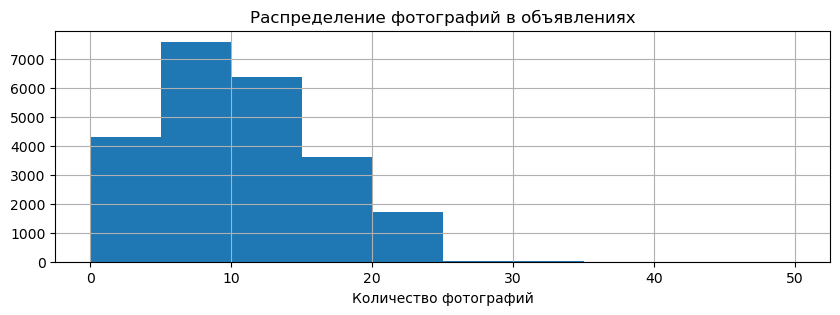

In [18]:
describe_all(df, 'total_images')
build_hist(df.total_images, 'Количество фотографий', 'Распределение фотографий в объявлениях')

Наиболее часто размещают 5-10 штук. Странно, что есть объявления без фотографий. Посчитаем их количество.

In [19]:
sum(df['total_images'] == 0)

1058

In [20]:
(df[df['total_images'] == 0]).sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
18426,0,8000000.0,54.7,2018-05-28T00:00:00,2,3.10,5.0,34.10,5,NaN,False,False,10.1,NaN,Санкт-Петербург,24615.0,2945.0,2.0,527.0,1.0,839.0,NaN
18076,0,2950000.0,29.1,2018-01-11T00:00:00,1,2.60,9.0,NaN,9,NaN,False,False,NaN,NaN,Санкт-Петербург,27852.0,11559.0,2.0,223.0,0.0,NaN,45.0
16259,0,4300000.0,45.6,2017-08-26T00:00:00,2,2.55,5.0,29.80,3,NaN,False,False,5.4,NaN,Санкт-Петербург,21905.0,8794.0,0.0,NaN,3.0,358.0,305.0
18410,0,2000000.0,61.9,2018-08-31T00:00:00,3,2.50,5.0,45.92,3,NaN,False,False,5.5,NaN,городской поселок Назия,NaN,NaN,NaN,NaN,NaN,NaN,122.0
14439,0,5600000.0,67.2,2018-01-15T00:00:00,3,2.55,5.0,43.60,1,NaN,False,False,9.0,2.0,Сестрорецк,56793.0,33722.0,0.0,NaN,2.0,270.0,60.0


Непонятно, но оставляем как есть.

### `last_price`

Количество пропусков: 0
Тип данных: float64
Детали: count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


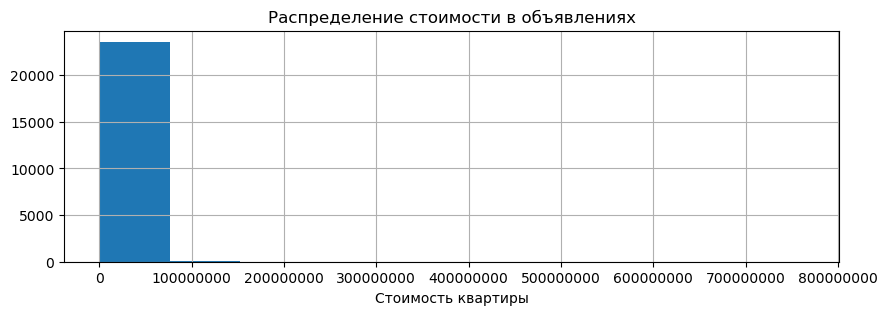

In [21]:
describe_all(df, 'last_price')
build_hist(df.last_price, 'Стоимость квартиры','Распределение стоимости в объявлениях')

In [22]:
df[df['last_price'] < 100000]    # квартира дешевле 100 тыс. руб.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Одна строка роли не играет, но остальные данные присутствуют, поэтому рискнем предположить, что цена указана в тысячах рублей, и исправим значение, увеличив его на 1000.

In [23]:
df['last_price'] = df['last_price'].replace(12190, 12190000)

In [24]:
df[df['last_price'] > 500000000]    # квартира дороже 500 млн. руб.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,False,False,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


Так же одна запись. Сложно сказать, но цена кажется не очень адекватной, удаляем

In [25]:
с

### `is_apartment`

Исправим тип данных на булев у столбца `is_apartment` (ведь такой тип указан в документации)

Но изначально заполним пропуски. Подход предлагаем простым: если в объявлении явно не указано, что продаются аппартаменты, то это не они.
Для того, чтобы пропуски получили значение `False`, заполняем их пробелом.

In [26]:
df['is_apartment'] = df['is_apartment'].fillna('')    
df['is_apartment'].value_counts()

is_apartment
         20889
False     2710
True        50
Name: count, dtype: int64

In [27]:
df['is_apartment'] = df['is_apartment'].astype('bool')    # меняем тип

In [28]:
df['is_apartment'].value_counts()

is_apartment
False    23599
True        50
Name: count, dtype: int64

### `total_area`, `living_area`, `kitchen_area`

Количество пропусков: 0
Тип данных: float64
Детали: count    23649.00
mean        60.31
std         35.59
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64


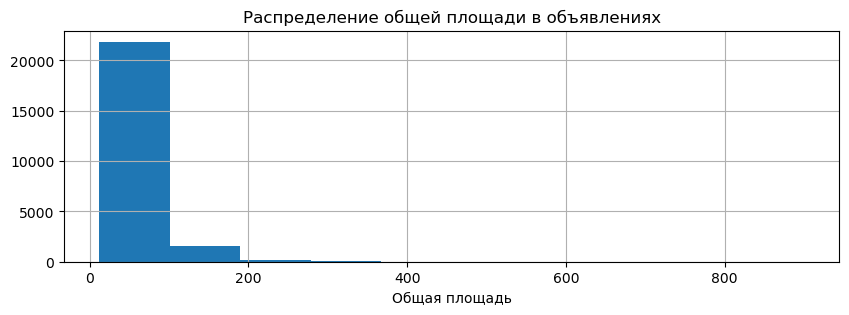

In [29]:
describe_all(df, 'total_area')
build_hist(df.total_area, 'Общая площадь','Распределение общей площади в объявлениях')

В основном, продаются квартиры до 100 квадратных метров...

Количество пропусков: 1898
Тип данных: float64
Детали: count    21751.00
mean        34.44
std         21.99
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64


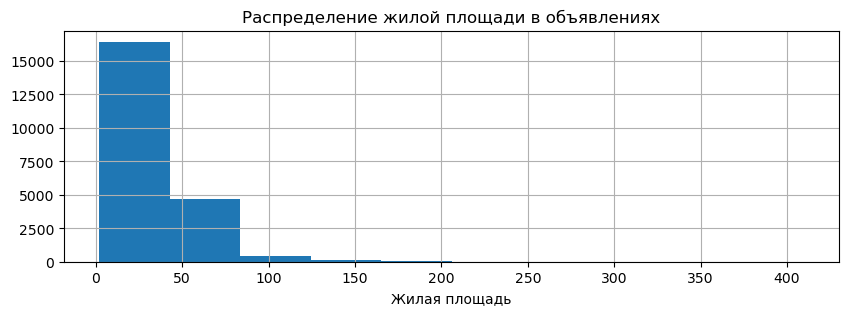

In [30]:
describe_all(df, 'living_area')
build_hist(df.living_area, 'Жилая площадь','Распределение жилой площади в объявлениях')

... с жилой площадью до 40 метров... и...

Количество пропусков: 2268
Тип данных: float64
Детали: count    21381.00
mean        10.57
std          5.90
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64


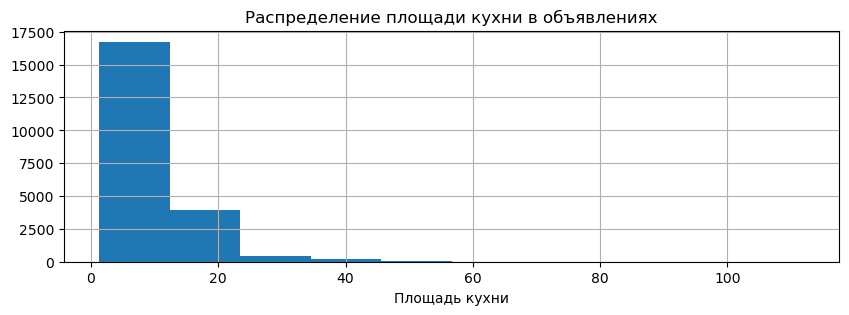

In [31]:
describe_all(df, 'kitchen_area')
build_hist(df.kitchen_area, 'Площадь кухни','Распределение площади кухни в объявлениях')

...и кухнями до 10 метров.

СНиП 31-01-2003 п 5.7: " 5.7 Площадь помещений в квартирах, указанных в 5.3, должна быть не менее: жилого помещения (комнаты) в однокомнатной квартире - 14 м, общего жилого помещения в квартирах с числом комнат две и более - 16 м, спальни - 8 м (10 м - на двух человек); кухни - 8 м; кухонной зоны в кухне-столовой - 6 м. В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м._

In [32]:
#  подсчитаем кол-во квартир, которые не являются студиями или квартирами с открытой планировкой, но при этом
#  имеют площади (кухни и жилой) менее тех, что прописаны в СНиП

df.query(
    '(living_area < 14 or kitchen_area < 5) and (is_open_plan or is_studio == False)'
)['total_area'].head()

6      37.3
76     55.1
101    37.0
114    21.4
248    31.0
Name: total_area, dtype: float64

Мы видим достаточное количество пропусков в столбцах `living_area` и `kitchen_area`, так же видим, что эти пропуски не совпадают ни с указанием, что это квартира-студия,  ни с упоминанием, что квартира имеет отрытую планировку. Т.о. пропуски нельзя заполнить корректно, не исказив данные, поэтому оставляем их.

Итого, общая площадь не может быть менее 19 квадратных метров, минимальный размер жилой площади - 14 м., а кухни - 5 м. В то же время, понимая, что множество квартир подвергалось перепланировке, склоняемся к тому, что необходимо убрать из датасета только квартиры с площадью менее 19-ти метров.

In [33]:
df[df['total_area'] < 19]['total_area'].count()    # считаем кол-во объявлений с площадью менее 19 кв. метров

24

In [34]:
df = df[df['total_area'] > 19]    # удаляем

Так же математически проверим, что у нас нет объявлений, где сумма площади кухни и жилой площади больше общей. Если такие объявления есть, удаляем их.

In [35]:
df['diff'] = df['total_area'] - df['living_area'] - df['kitchen_area']
display(sum(df['diff'] < 0))
df = df[df['diff'] > 0]    # удаляем
df = df.drop('diff', axis=1)

67

На всякий случай посмотрим, сколько комнат в квартирах, площадь которых более 200 метров.

In [37]:
df[df['total_area'] > 200]['rooms'].value_counts()

rooms
5     51
6     40
4     34
7     32
3      9
8      7
9      7
10     3
14     2
15     1
19     1
16     1
12     1
Name: count, dtype: int64

От трех до девятнадцати комнат! Посмотрим на квартиры, площадью более 200 квадратных метров и имеющие более 12-ти комнат.

In [38]:
df[(df['total_area'] > 200)&(df['rooms'] > 12)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
866,5,25000000.0,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,False,False,False,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,False,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,NaN,5.0,264.5,2,False,False,False,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02T00:00:00,16,3.00,4.0,180.0,4,False,False,False,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
20829,6,28659000.0,245.4,2016-03-31T00:00:00,14,NaN,4.0,168.3,2,False,False,False,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0


In [ ]:
Ничего подозрительного, обычный рынок элитного жилья.

### `first_day_exposition`, `days_exposition`

Теперь поработаем со столбцом `first_day_exposition` при помощи метода  `to_datetime()`, который переводит строки в даты. Проверим, за какой период предоставленны данные.

Timestamp('2014-11-27 00:00:00')

Timestamp('2019-05-03 00:00:00')

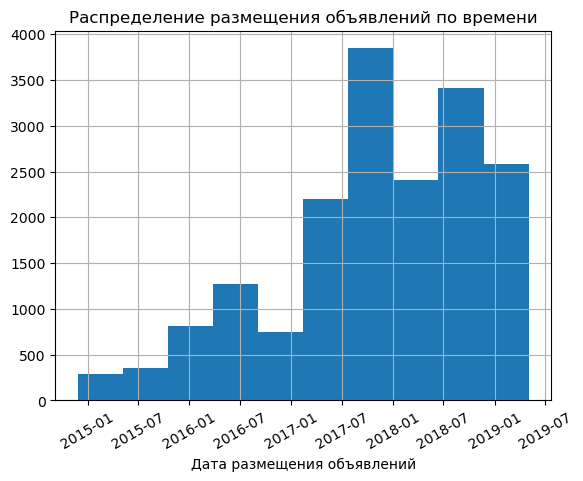

In [150]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
display(df['first_day_exposition'].min(), df['first_day_exposition'].max())

plt.hist(df['first_day_exposition'])
plt.grid()
plt.xticks(rotation=30)
plt.xlabel('Дата размещения объявлений')
plt.title('Распределение размещения объявлений по времени')
plt.show()

Датафрейм содержит данные с конца ноября 2014 по начало мая 2019 годов, резкий рост продаж начался с февраля 2017 года.

In [44]:
describe_all(df, 'days_exposition')

Количество пропусков: 2874
Тип данных: float64
Детали: count    17936.00
mean       185.82
std        222.16
min          1.00
25%         45.00
50%        102.00
75%        240.00
max       1580.00
Name: days_exposition, dtype: float64


Пропуски в данных говорят о том, что объявления все еще актуальны.

Смотрим, что не так с объявлениями, которые размещены более 1000 дней.

In [46]:
df[df['days_exposition'] > 1000].sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
6465,14,1850000.0,73.0,2016-01-13T00:00:00,3,2.55,5.0,42.70,3,False,False,False,8.30,NaN,поселок Рябово,NaN,NaN,NaN,NaN,NaN,NaN,1100.0
11101,6,2960431.0,35.4,2015-03-06T00:00:00,1,2.70,25.0,16.10,25,False,False,False,10.70,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,1054.0
6332,6,5650000.0,57.3,2014-12-10T00:00:00,3,2.50,9.0,38.50,4,False,False,False,8.20,1.0,Санкт-Петербург,15662.0,11883.0,0.0,NaN,0.0,NaN,1194.0
1570,6,1950000.0,50.0,2015-04-03T00:00:00,3,2.50,5.0,34.00,5,False,False,False,6.50,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,1283.0
10795,11,4250000.0,51.0,2015-06-17T00:00:00,2,2.60,9.0,30.50,9,False,False,False,7.00,NaN,Санкт-Петербург,13413.0,16005.0,0.0,NaN,0.0,NaN,1181.0
10452,12,4750000.0,33.6,2016-06-14T00:00:00,1,2.75,15.0,16.90,10,False,False,False,8.40,NaN,Санкт-Петербург,27573.0,9436.0,1.0,714.0,0.0,NaN,1015.0
7859,4,3990000.0,45.0,2016-03-11T00:00:00,2,2.50,5.0,26.00,5,False,False,False,6.00,NaN,Санкт-Петербург,40951.0,11133.0,2.0,571.0,0.0,NaN,1075.0
5121,5,9272765.0,67.3,2015-03-10T00:00:00,2,2.70,9.0,32.00,2,False,False,False,11.60,NaN,Санкт-Петербург,23604.0,5294.0,0.0,NaN,1.0,434.0,1127.0
13599,2,3715100.0,38.3,2015-09-20T00:00:00,1,2.60,15.0,15.65,2,False,False,False,12.37,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,1313.0
19301,6,5827690.0,89.2,2015-03-10T00:00:00,3,2.70,21.0,46.70,8,False,False,False,17.10,NaN,Санкт-Петербург,21793.0,17121.0,0.0,NaN,1.0,31.0,1171.0


Не очень очевидно, но видно, что это одни из самых первых объявлений (2014 -2015 гг.).

### `rooms`

Количество пропусков: 0
Тип данных: int64
Детали: count    20810.00
mean         2.10
std          1.07
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64


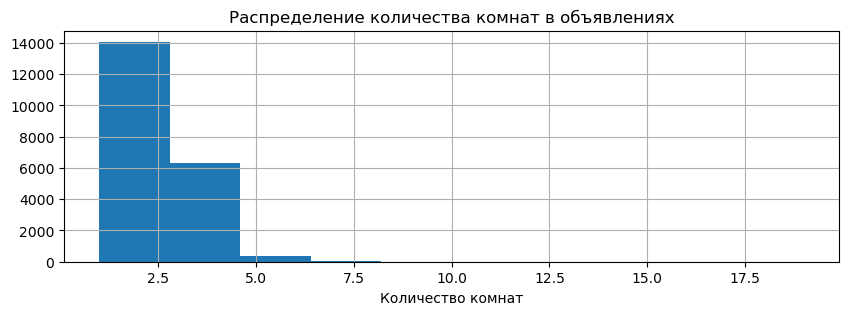

In [47]:
describe_all(df, 'rooms')
build_hist(df.rooms, 'Количество комнат','Распределение количества комнат в объявлениях')

Основная масса представленных на рынке квартир  - одна-, двух- и трехкомнатные.

### `ceiling_height`

Количество пропусков: 7569
Тип данных: float64
Детали: count    13241.00
mean         2.75
std          0.87
min          1.00
25%          2.51
50%          2.65
75%          2.80
max         32.00
Name: ceiling_height, dtype: float64


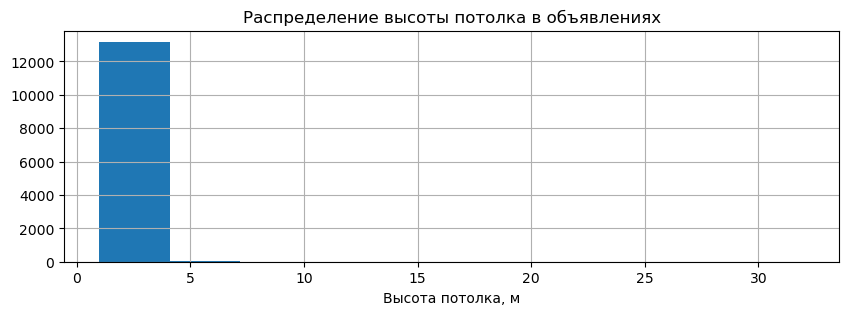

In [49]:
describe_all(df, 'ceiling_height')
build_hist(df.ceiling_height, 'Высота потолка, м','Распределение высоты потолка в объявлениях')

_Минимальная высота потолка определяется СНиП как 2,5 м. Такие потолки характерны для хрущевок. В новостройках их минимальная высота составляет 2,6 метра. А в элитных домах она может быть более 3 м._

Предполагается такой подход к исправлению пропусков и аномальных значений:

* если речь о квартире бизнес-класса и ниже -  подставляем медианную высоту потолка по всем квартирам такого ценового диапозона;
* у элитной квартиры расcчитываем и вставляем медианное значение по жилью аналогичного класса; 
* если речь идет об апартаментах, пропущенные значения меняем на медианную высоту потолка апартаментов;

Цена элитной квартиры отличается от квартир бизнес-класса и ниже в 3-6 раз.
Возьмем значение `last_price` третьей квадрили (6,8 млн. руб.) и умножим на 4, получаем цену от 27-ти млн. руб.

In [50]:
# считаем кол-во квартир с аномальной высотой потолка 

display((df[df['ceiling_height'] > 5]['ceiling_height'].count() + 
         df[df['ceiling_height'] < 2.5]['ceiling_height'].count()))

88

In [51]:
df.loc[(df['ceiling_height'] < 2.5) | (df['ceiling_height'] > 5), 'ceiling_height'] = None    # обнуляем значения
describe_all(df, 'ceiling_height')

Количество пропусков: 7657
Тип данных: float64
Детали: count    13153.00
mean         2.72
std          0.27
min          2.50
25%          2.52
50%          2.65
75%          2.80
max          4.90
Name: ceiling_height, dtype: float64


In [52]:
print(np.quantile(df['last_price'], 0.01))    # порог цен для объявлений

print(np.quantile(df['last_price'], 0.99))

1070000.0
35273529.99999997


Напишем функцию для категоризации жилья.

In [53]:
def realty_type(row):
    apart = row['is_apartment']
    price = row['last_price']
    
    if apart == False:
        if price >= 35000000:
            return 'luxury'
    if apart == False:
        if price < 35000000:
            return 'flat'
    return 'apartment'

In [54]:
df['realty_type'] = df.apply(realty_type, axis=1)
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,realty_type
12255,3,6500000.0,90.0,2018-10-23T00:00:00,3,2.76,9.0,57.0,3,False,False,False,11.0,NaN,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,24.0,flat
9191,7,4200000.0,71.9,2018-04-04T00:00:00,3,3.20,2.0,55.7,2,False,False,False,9.5,NaN,Красное Село,25308.0,28732.0,3.0,249.0,0.0,NaN,209.0,flat
7992,10,6300000.0,75.0,2018-12-03T00:00:00,3,2.60,9.0,45.0,7,False,False,False,10.0,NaN,Санкт-Петербург,13247.0,15838.0,0.0,NaN,0.0,NaN,NaN,flat
14656,7,1990000.0,32.9,2019-02-28T00:00:00,1,NaN,12.0,16.7,3,False,False,False,6.3,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flat
14049,3,6900000.0,82.4,2018-10-15T00:00:00,3,3.60,4.0,59.3,3,False,False,False,8.8,NaN,Санкт-Петербург,26767.0,5469.0,2.0,486.0,1.0,165.0,60.0,flat


In [55]:
# смотрим на медиану в каждой категории и заполняем пропуски

df.groupby(by='realty_type')['ceiling_height'].median()

realty_type
apartment    3.00
flat         2.65
luxury       3.20
Name: ceiling_height, dtype: float64

In [56]:
# заполняем пропуски медианным значением

df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('realty_type')['ceiling_height']
        .transform('median'))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,realty_type
2356,11,50000000.0,128.0,2016-06-24T00:00:00,3,3.20,9.0,42.0,1,False,False,False,50.0,0.0,Санкт-Петербург,26933.0,5780.0,1.0,625.0,1.0,283.0,27.0,luxury
16461,17,245000000.0,285.7,2017-04-10T00:00:00,6,3.35,7.0,182.8,4,False,False,False,29.8,NaN,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0,luxury
5042,20,35000000.0,380.0,2017-08-17T00:00:00,6,3.20,3.0,198.0,2,False,False,False,50.0,0.0,Пушкин,18490.0,30643.0,1.0,527.0,1.0,668.0,15.0,luxury


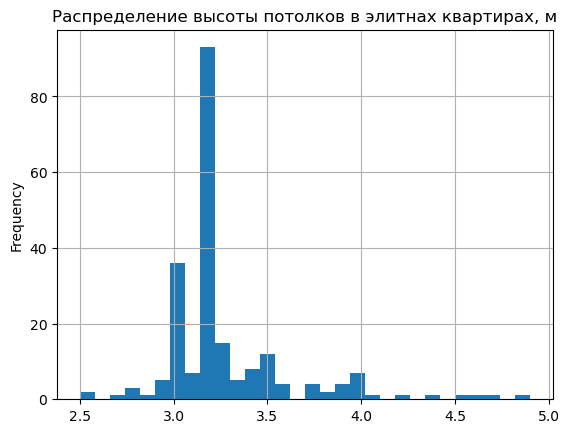

In [57]:
display(df[df['realty_type'] == 'luxury'].sample(3))    # выводим 5 случайных строк о продаже элитных квартир

df[df['realty_type'] == 'luxury']['ceiling_height'].plot(    # строим гистограмму высоты потолка
    kind = 'hist',
    bins=30,
    grid=True,
    title='Распределение высоты потолков в элитнах квартирах, м') 
plt.show()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,realty_type
1990,6,3000000.0,56.0,2015-07-22T00:00:00,3,2.65,5.0,43.0,5,False,False,False,6.0,0.0,Колпино,23649.0,29436.0,0.0,NaN,1.0,668.0,345.0,flat
16975,1,1700000.0,35.8,2016-07-27T00:00:00,1,2.50,5.0,17.5,4,False,False,False,9.0,2.0,Приозерск,NaN,NaN,NaN,NaN,NaN,NaN,800.0,flat
6271,13,4890000.0,44.5,2019-02-25T00:00:00,2,2.50,5.0,30.5,2,False,False,False,5.5,1.0,Санкт-Петербург,14664.0,12446.0,0.0,NaN,0.0,NaN,14.0,flat


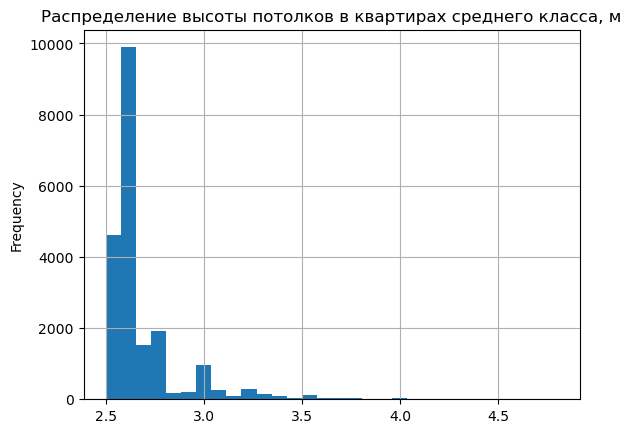

In [58]:
display(df[df['realty_type'] == 'flat'].sample(3))    # выводим 5 случаных строк о продаже обычных квартир
      
df[df['realty_type'] == 'flat']['ceiling_height'].plot(    # строим гистограмму высоты потолка
    kind = 'hist',
    bins=30,
    grid=True,
    title='Распределение высоты потолков в квартирах среднего класса, м')    
plt.show()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,realty_type
7362,18,4300000.0,41.76,2018-06-12T00:00:00,1,2.65,20.0,13.92,6,True,False,False,11.37,2.0,Санкт-Петербург,39141.0,15985.0,0.0,NaN,0.0,NaN,44.0,apartment
23236,18,13900000.0,95.00,2017-10-15T00:00:00,3,2.80,15.0,50.00,15,True,False,False,11.00,4.0,Санкт-Петербург,27573.0,9436.0,1.0,714.0,0.0,NaN,7.0,apartment
7206,7,5289476.0,46.90,2018-07-18T00:00:00,1,3.15,4.0,16.47,2,True,False,False,14.46,1.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,278.0,apartment


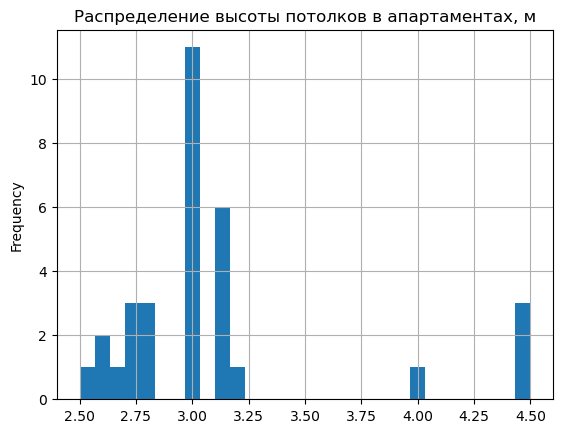

In [59]:
display(df[df['realty_type'] == 'apartment'].sample(3))    # выводим 5 случаных строк о продаже апартаментов
        
df[df['realty_type'] == 'apartment']['ceiling_height'].plot(     # строим гистограмму высоты потолка
    kind = 'hist',
    bins=30,
    grid=True,
    title='Распределение высоты потолков в апартаментах, м')    
plt.show()

### `floors_total`, `floor`

Количество пропусков: 38
Тип данных: float64
Детали: count    20772.00
mean        10.56
std          6.51
min          1.00
25%          5.00
50%          9.00
75%         15.00
max         60.00
Name: floors_total, dtype: float64


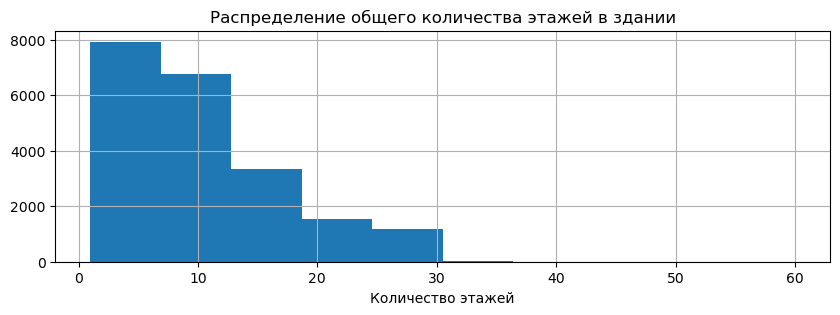

In [60]:
describe_all(df, 'floors_total')
build_hist(df.floors_total, 'Количество этажей','Распределение общего количества этажей в здании')

Количество пропусков: 0
Тип данных: int64
Детали: count    20810.00
mean         5.85
std          4.82
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64


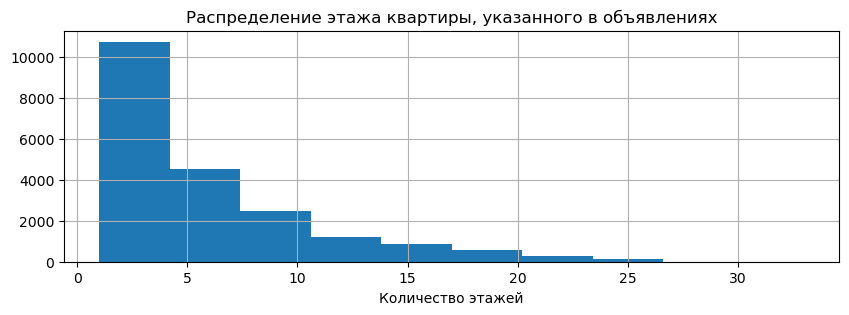

In [61]:
describe_all(df, 'floor')
build_hist(df.floor, 'Количество этажей','Распределение этажа квартиры, указанного в объявлениях')

В колонке `floor` пропусков нет, а в колонке `floors_total` - 38 штук. Присваиваем этажнось дома по этажу объекта, указанного в объявлении.

In [62]:
df.loc[df['floors_total'].isnull(), 'floors_total'] = df.loc[df['floors_total'].isnull(), 'floor']

Самое высокое жилое здание Петербурга -  36 этажей по адресу: проспект Обуховской обороны, 138, корпус 2, литер А. Смотрим на объявления с этажами выше возможного.

In [64]:
df[df['floors_total'] > 36]    # ищем строки с floors_total больше 36-ти

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,realty_type
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,False,False,False,7.40,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,flat
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,False,False,False,14.00,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,flat
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,2.65,37.0,17.4,5,False,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,flat


In [65]:
df = df[df['floors_total'] < 36]    # удаляем
df['floors_total'] = df['floors_total'].astype(int)    # переводим в цельночисленный формат

### `balcony`

In [66]:
describe_all(df, 'balcony')

Количество пропусков: 9700
Тип данных: float64
Детали: count    11104.00
mean         1.16
std          1.06
min          0.00
25%          0.00
50%          1.00
75%          2.00
max          5.00
Name: balcony, dtype: float64


Если в объявлении не указано число балконов (столбец `balcony`) — то, скорее всего, их нет. Такие пропуски заменяем на 0 и меняем тип данных на цельночисленный.

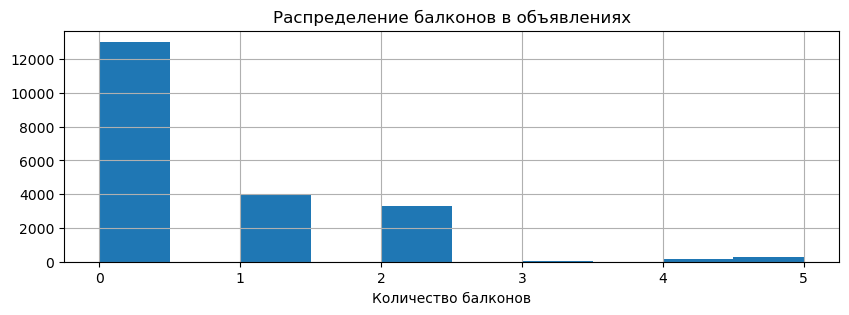

In [67]:
df['balcony'] = df['balcony'].fillna(0).astype('int')
build_hist(df.balcony, 'Количество балконов','Распределение балконов в объявлениях')

### `parks_around_3000`,  `parks_nearest`,  `ponds_around_3000`, `ponds_nearest`

Количество пропусков: 4597
Тип данных: float64
Детали: count    16207.00
mean         0.61
std          0.80
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: parks_around_3000, dtype: float64


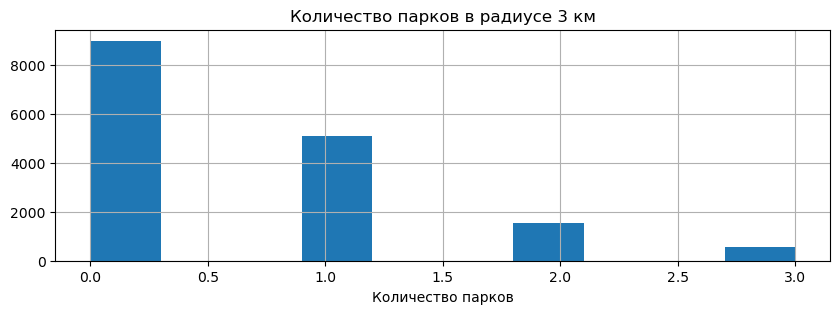

In [68]:
describe_all(df, 'parks_around_3000')
build_hist(df.parks_around_3000, 'Количество парков','Количество парков в радиусе 3 км')

Количество пропусков: 13591
Тип данных: float64
Детали: count    7213.00
mean      488.26
std       337.42
min         1.00
25%       288.00
50%       454.00
75%       611.00
max      3190.00
Name: parks_nearest, dtype: float64


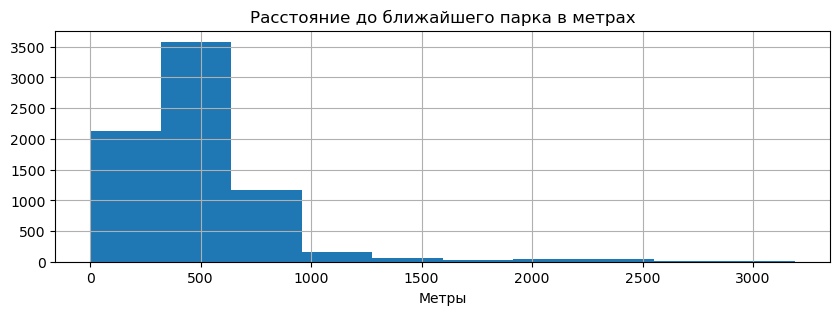

In [69]:
describe_all(df, 'parks_nearest')
build_hist(df.parks_nearest, 'Метры','Расстояние до ближайшего парка в метрах')

In [70]:
df.query('parks_nearest > 3000 and parks_around_3000 != 0')['parks_around_3000'].count()

0

Проверили, что нет ошибок (когда в объявлении указан парк в радиусе 3-х км, а расстояние до ближайшего парка на самом деле больше). 

То же самое с прудом. Выведем общую информацию и гистограммы, проверим наличие ошибок. 

Количество пропусков: 4597
Тип данных: float64
Детали: count    16207.00
mean         0.76
std          0.94
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          3.00
Name: ponds_around_3000, dtype: float64


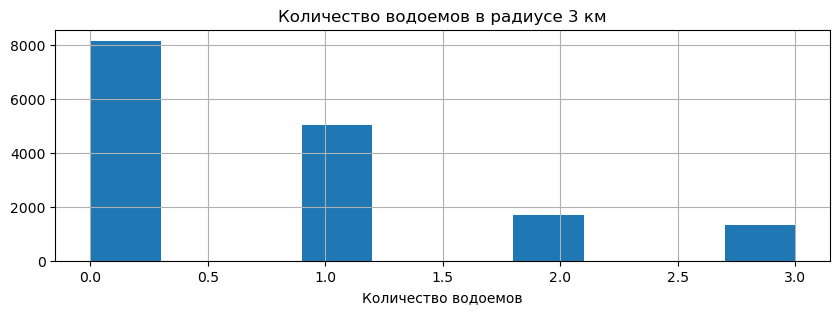

In [71]:
describe_all(df, 'ponds_around_3000')
build_hist(df.ponds_around_3000, 'Количество водоемов','Количество водоемов в радиусе 3 км')

Количество пропусков: 12763
Тип данных: float64
Детали: count    8041.00
mean      519.41
std       277.34
min        13.00
25%       295.00
50%       503.00
75%       733.00
max      1344.00
Name: ponds_nearest, dtype: float64


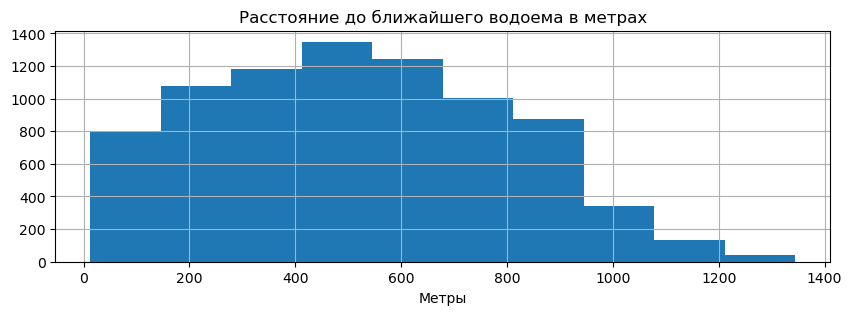

In [72]:
describe_all(df, 'ponds_nearest')
build_hist(df.ponds_nearest, 'Метры','Расстояние до ближайшего водоема в метрах')

In [73]:
df.query('ponds_nearest > 3000 and ponds_around_3000 != 0')['ponds_around_3000'].count()

0

Похоже, что в каждом парке есть как минимум один пруд. И все практически рядом, на расстоянии полукилометра.

Пропуски в столбцах `parks_around_3000` и `ponds_around_3000` заполним нулевым значением (так же, как поступили, рассуждая о количестве балконов) и приведем к цельночисленному формату.

In [74]:
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0).astype('int')
df['parks_around_3000'] = df['parks_around_3000'].fillna(0).astype('int')

Сведения о расстоянии до ближайшего пруда или парка нам не доступны, оставляем пропуски.

### `airports_nearest`, `city_centers_nearest`

Количество пропусков: 4598
Тип данных: float64
Детали: count    16206.00
mean     14246.42
std       8665.40
min        181.00
25%       9356.00
50%      13114.00
75%      16268.00
max      65968.00
Name: city_centers_nearest, dtype: float64


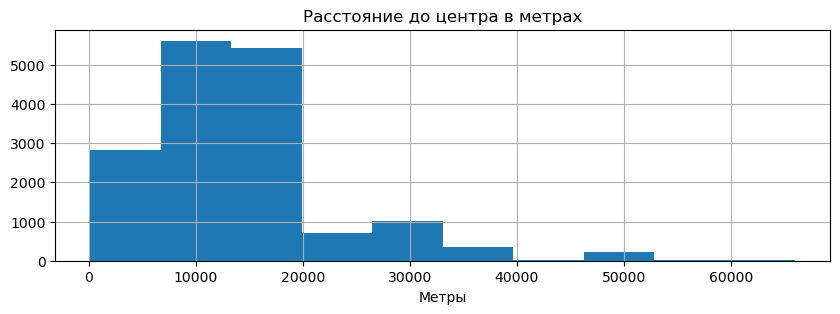

In [75]:
describe_all(df, 'city_centers_nearest')
build_hist(df.city_centers_nearest, 'Метры','Расстояние до центра в метрах')

Как мы видим, в данных о расстоянии до центра города так же есть пропуски. С учетом того, что эта часть информации была получена автоматически, на основании картографических данных, считем правильным не заполнять ее никакими расчетами самостоятельно, а оставить как есть.

Количество пропусков: 4619
Тип данных: float64
Детали: count    16185.00
mean     28788.40
std      12651.72
min          0.00
25%      18522.00
50%      26729.00
75%      37236.00
max      84869.00
Name: airports_nearest, dtype: float64


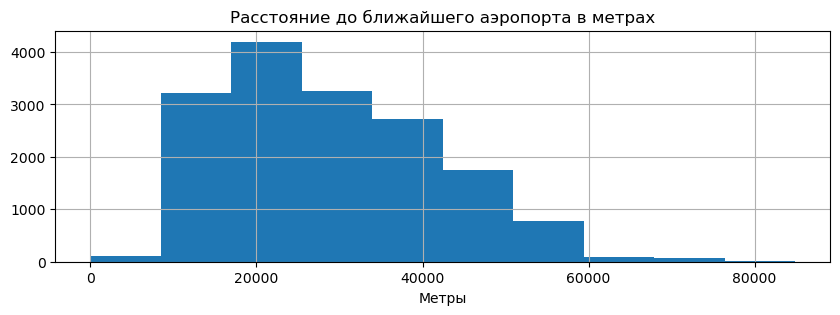

In [76]:
describe_all(df, 'airports_nearest')
build_hist(df.airports_nearest, 'Метры','Расстояние до ближайшего аэропорта в метрах')

In [77]:
df.query('airports_nearest < 50')    # находим и удаляем строку, где расстояние до аэропорта=0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,realty_type
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9,19.8,3,False,False,False,6.0,2,Санкт-Петербург,0.0,22801.0,0,NaN,0,NaN,60.0,flat


In [78]:
df = df.query('airports_nearest != 0')

Квартиры в центре есть, а в аэропорту - нет. Это хорошо, идем дальше.

### Вывод

Итак, теперь мы знаем, что датафрейм содержит объявления о продаже недвижимости в Санкт-Петербурге и области за период с ноября  2014 по начало мая 2019 годов.

Мы убрали артефакты, частично заполнили пропуски в даннах, изменили формат столбцов и даже категоризировали наши объявления, выявив три группы (апартаменты, элитные квартиры и квартиры бизнес-класса и ниже)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20803 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20803 non-null  int64  
 1   last_price            20803 non-null  float64
 2   total_area            20803 non-null  float64
 3   first_day_exposition  20803 non-null  object 
 4   rooms                 20803 non-null  int64  
 5   ceiling_height        20803 non-null  float64
 6   floors_total          20803 non-null  int32  
 7   living_area           20803 non-null  float64
 8   floor                 20803 non-null  int64  
 9   is_apartment          20803 non-null  bool   
 10  is_studio             20803 non-null  bool   
 11  is_open_plan          20803 non-null  bool   
 12  kitchen_area          20803 non-null  float64
 13  balcony               20803 non-null  int32  
 14  locality_name         20803 non-null  object 
 15  airports_nearest      16

## Расчёты и добавление результатов в таблицу

Теперь, добавляем в таблицу новые расчетные значения и строим гистограммы для каждого параметра.

### * цена квадратного метра

In [81]:
df['price_to_m'] = df['last_price'] / df['total_area']

Количество пропусков: 0
Тип данных: float64
Детали: count      20803.00
mean       99160.29
std        47915.90
min         9615.38
25%        76923.08
50%        94899.17
75%       113705.43
max      1736842.11
Name: price_to_m, dtype: float64


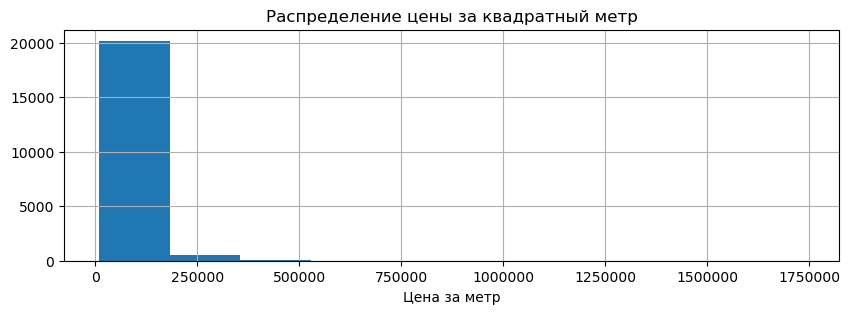

In [82]:
describe_all(df, 'price_to_m')
build_hist(df.price_to_m, 'Цена за метр','Распределение цены за квадратный метр')

### * день недели, месяц и год публикации объявления

In [152]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday    # день недели
df['month_exposition'] = df['first_day_exposition'].dt.month    # месяц
df['year_exposition'] = df['first_day_exposition'].dt.year    # год

### * этаж квартиры: первый, последний, другой

In [84]:
df['floor_type'] = ['other']*len(df)
df.loc[df['floor'] == 1, 'floor_type'] = 'first'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'last'

df.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,realty_type,price_to_m,floor_type
4923,10,6600000.0,56.8,2017-01-25T00:00:00,2,2.55,17,32.0,9,False,False,False,8.2,2,Санкт-Петербург,7900.0,13142.0,1,506.0,0,NaN,182.0,flat,116197.183099,other
10981,6,5200000.0,72.0,2018-08-18T00:00:00,4,2.50,9,40.0,2,False,False,False,6.0,0,Санкт-Петербург,32506.0,11652.0,1,584.0,0,NaN,103.0,flat,72222.222222,other
2195,14,3600000.0,52.7,2017-06-30T00:00:00,2,2.65,9,29.0,8,False,False,False,8.7,0,Санкт-Петербург,35307.0,14698.0,0,NaN,1,214.0,3.0,flat,68311.195446,other


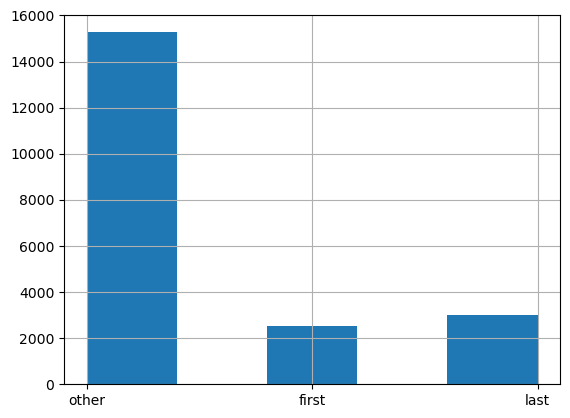

In [85]:
df['floor_type'].hist(bins=5)
plt.show()

* соотношение жилой и общей площади, а также отношение площади кухни к общей

In [86]:
df['living_to_total_area'] = df['living_area'] / df['total_area']
df['kitchen_to_total_area'] = df['kitchen_area'] / df['total_area']

Количество пропусков: 0
Тип данных: float64
Детали: count    20803.00
mean         0.56
std          0.10
min          0.02
25%          0.49
50%          0.57
75%          0.63
max          0.91
Name: living_to_total_area, dtype: float64


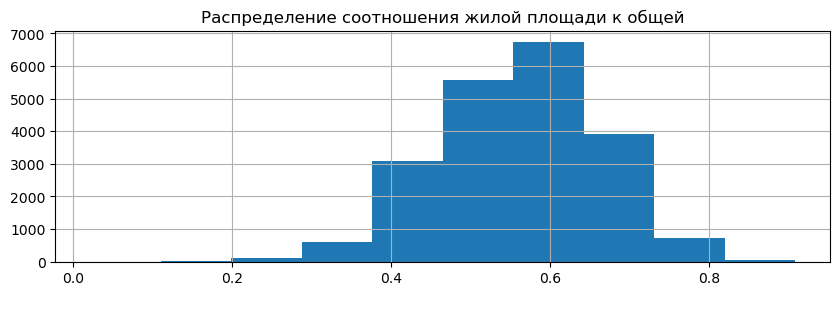

In [87]:
describe_all(df, 'living_to_total_area')
build_hist(df.living_to_total_area, ' ','Распределение соотношения жилой площади к общей')

Количество пропусков: 0
Тип данных: float64
Детали: count    20803.00
mean         0.19
std          0.07
min          0.03
25%          0.13
50%          0.17
75%          0.23
max          0.72
Name: kitchen_to_total_area, dtype: float64


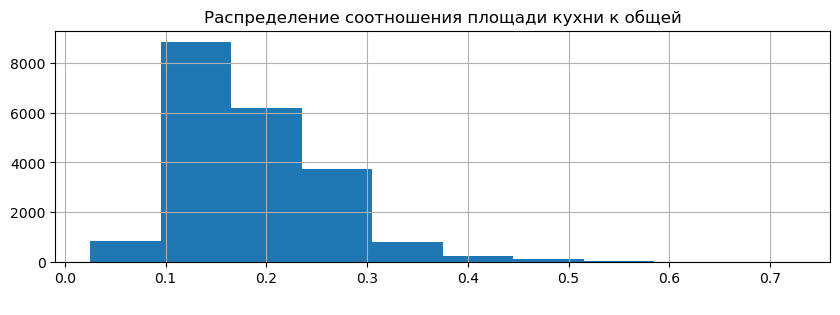

In [88]:
describe_all(df, 'kitchen_to_total_area')
build_hist(df.kitchen_to_total_area, ' ','Распределение соотношения площади кухни к общей')

### * выделены Санкт-Петербург и область

In [89]:
df['locality_name'].value_counts().head(10)    # топ 10 локаций

locality_name
Санкт-Петербург      13988
поселок Мурино         425
поселок Шушары         392
Всеволожск             351
Пушкин                 336
Колпино                321
поселок Парголово      287
Гатчина                286
деревня Кудрово        224
Петергоф               188
Name: count, dtype: int64

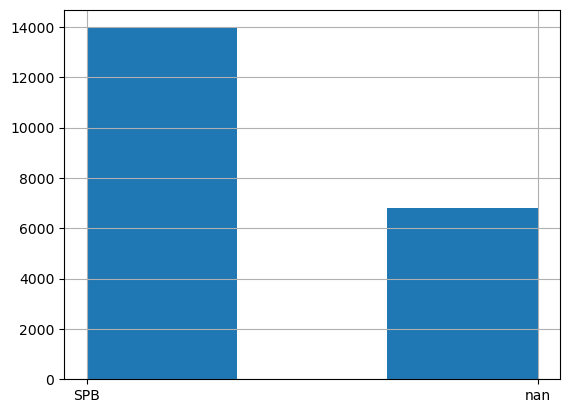

In [90]:
df.loc[df['locality_name'] == 'Санкт-Петербург', 'locality'] = 'SPB'
df['locality'] = df['locality'].fillna('suburban area')
df['locality'].hist(bins=3)
plt.show()

Как и ожидалось, большая часть объявлений - продажа квартир и апартаментов в Санкт-Петербурге.

## Исследовательский анализ данных

### * анализ времени продажи жилья

In [91]:
describe_all(df, 'days_exposition')

Количество пропусков: 2873
Тип данных: float64
Детали: count    17930.00
mean       185.86
std        222.19
min          1.00
25%         45.00
50%        102.00
75%        240.00
max       1580.00
Name: days_exposition, dtype: float64


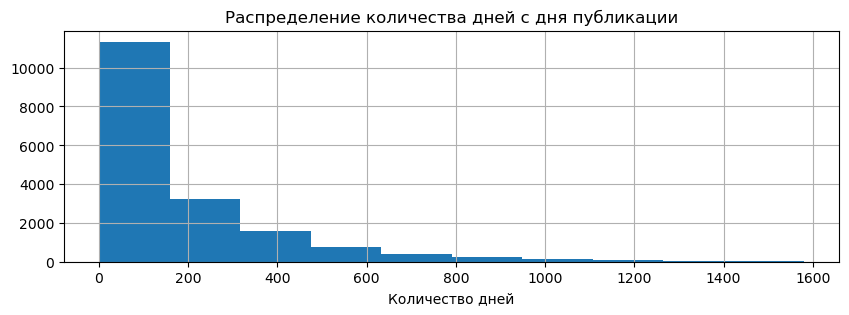

In [92]:
build_hist(df.days_exposition, 'Количество дней','Распределение количества дней с дня публикации')

Посмотрим детальнее на основную часть распределения у видим пики в пределах 45-ти и 60-ти дней. Видимо, это сваязано с особенностями сервиса Я. Недвижимость.

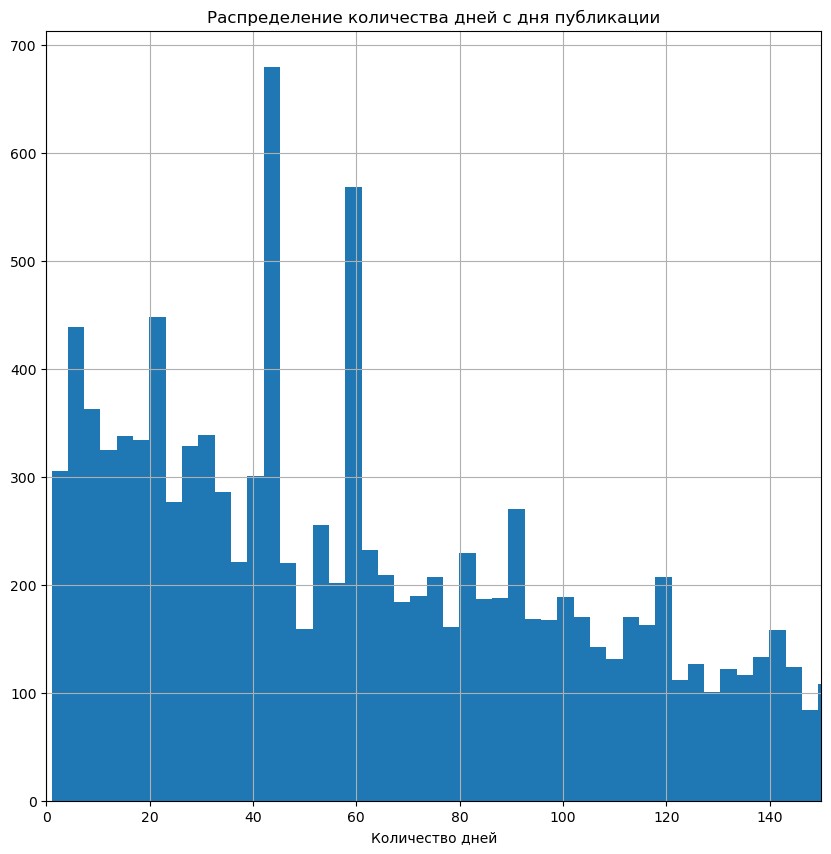

In [94]:
plt.figure(figsize=(10,10))    
df.days_exposition.hist(bins=500)
plt.xlabel('Количество дней')
plt.title('Распределение количества дней с дня публикации')
plt.xlim(0,150)
plt.show()

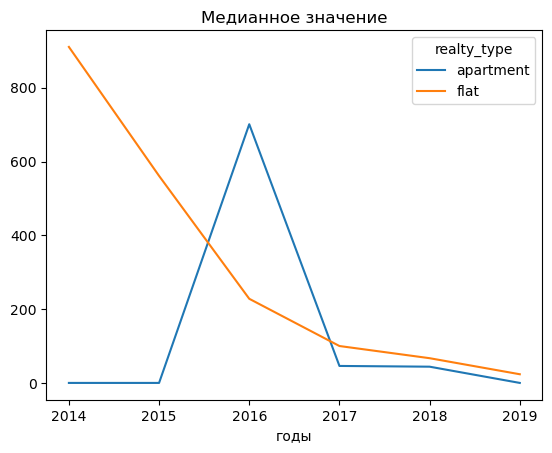

realty_type,year_exposition,apartment,flat
0,2014,0.0,910.5
1,2015,0.0,561.0
2,2016,701.0,228.0
3,2017,46.0,100.0
4,2018,44.0,67.0
5,2019,0.0,23.5


In [153]:
median_days_stat = df.pivot_table(    # считаем медиану кол-ва дней по годам
    index='year_exposition', 
    columns='realty_type',
    values='days_exposition', 
    aggfunc='median'
).fillna(0).reset_index()

mean_days_stat = df.pivot_table(    # считаем среднее кол-во дней по годам
    index='year_exposition', 
    columns='realty_type',
    values='days_exposition', 
    aggfunc='mean'
).fillna(0).reset_index()

median_days_stat.plot(x='year_exposition') 
plt.xlabel('годы')
plt.title('Медианное значение')
plt.show()

display(median_days_stat)

По типам жилья тенденция к сокращению сроков продажи одинакова для всех.
Причем, у свежих объявлений больше шансов. 

Дольше всего продается недвижимость, объявления о продаже которых разместили в 2014 году.
Зато в 2019 предложение находит своего покупателя в среднем за месяц (чуть более месяца - не элитное жилье, и менее месяца - элитное). 

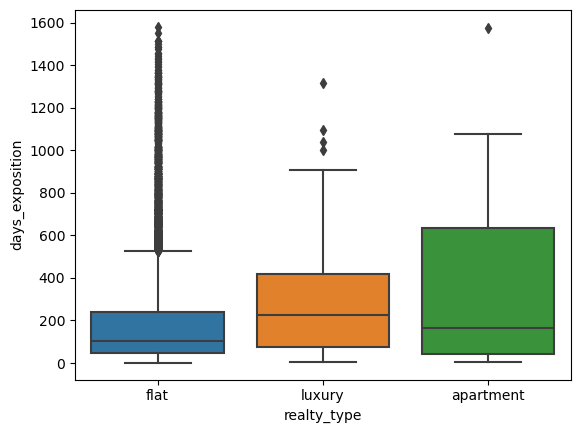

In [97]:
#NEW!!!

sns.boxplot(x='realty_type', y='days_exposition', data=df)
plt.show()

Быстрыми продажами считаются продажи 3 дня и меньше; а продажи более 240 дней для квартир, 400 дней дл элитного жилья и более 600 дней для апартаментов - долгими.

### * анализ общей площади, цене, числу комнат и высоте потолков.

Строим график размаха по всем пунктам для оценки выбросов.

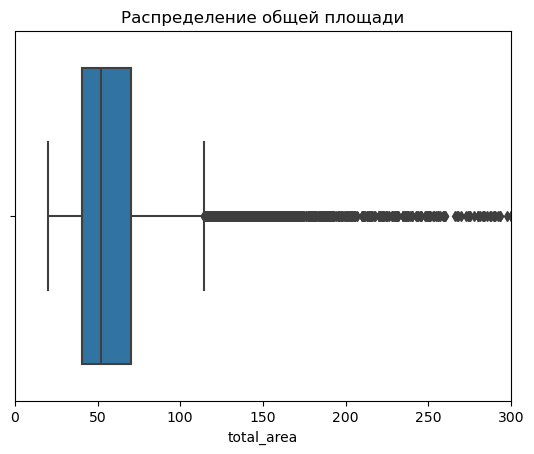

In [98]:
sns.boxplot(x='total_area', data=df)
plt.title('Распределение общей площади', fontsize= 12)
plt.xlim(0,300)
plt.show()

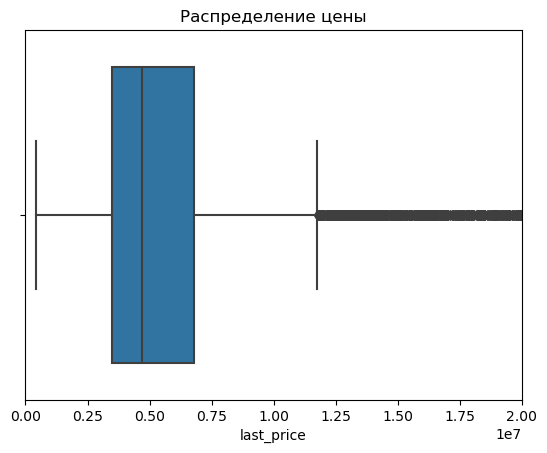

In [99]:
sns.boxplot(x='last_price', data=df)
plt.title('Распределение цены', fontsize= 12)
plt.xlim(0,20000000)
plt.show()

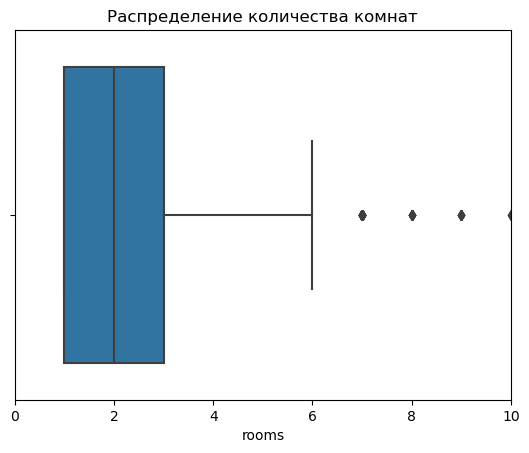

In [100]:
sns.boxplot(x='rooms', data=df)
plt.title('Распределение количества комнат', fontsize= 12)
plt.xlim(0,10)
plt.show()

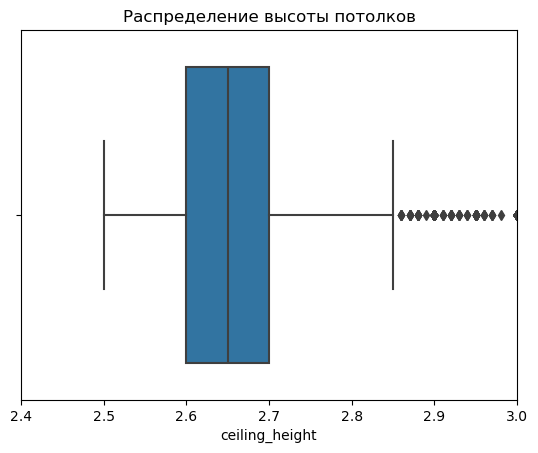

In [101]:
sns.boxplot(x='ceiling_height', data=df)
plt.title('Распределение высоты потолков', fontsize= 12)
plt.xlim(2.4,3)
plt.show()


На основании чуть округленных значений правого уса графиков размаха уберем выбросы в части количества комнат и высоты потолков. Если выбросов слишком много, они плотно расположены и сливаются в одну линию (как в распределении общей площади), берем значение там, где видны первые просветы.

Общую цену жилья мы ограничивать не будем, считая, что озвученные корректировки датасета позволят привести ее к более разумному значению естественным путем.

In [103]:
df = df.query('rooms <= 6 & ceiling_height <= 2.85 & total_area <= 270 & last_price <= 19000000')   # убираем выбросы

df.info()

###  * какие факторы влияют на цену

Проверим влияние на цену года, месяца и дня недели публикации объявления на основе среднего значения.

In [106]:
def relation_last_price(df, row):
    data = df.pivot_table(
    index=row, 
    values='last_price', 
    aggfunc='mean'
    ).fillna(0)
    display(data)
    ax = data.plot(xticks=data.index)
    ylab = ax.set_ylabel('last_price, 10**7 руб.')

,last_price
year_exposition,
2014,7.179755e+06
2015,5.522400e+06
2016,4.942245e+06
2017,4.954070e+06
2018,4.940740e+06
2019,5.248816e+06


Text(0.5, 1.0, 'Зависимость цены от года размещения объявления')

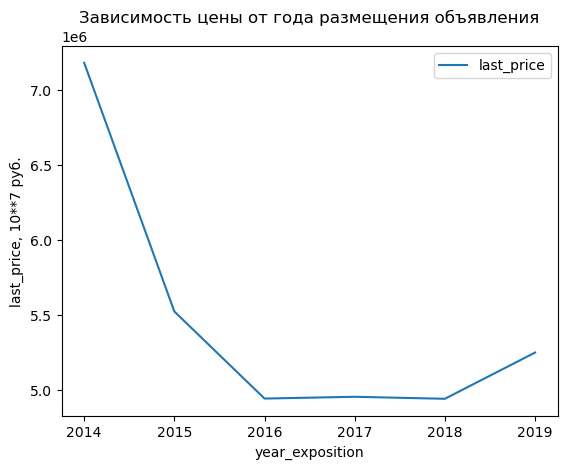

In [154]:
relation_last_price(df, 'year_exposition')
plt.title('Зависимость цены от года размещения объявления', fontsize= 12)

,last_price
weekday_exposition,
0,5.000500e+06
1,5.040373e+06
2,5.031418e+06
3,5.046347e+06
4,5.018545e+06
5,4.971711e+06
6,4.994513e+06


Text(0.5, 1.0, 'Зависимость цены от дня недели размещения объявления')

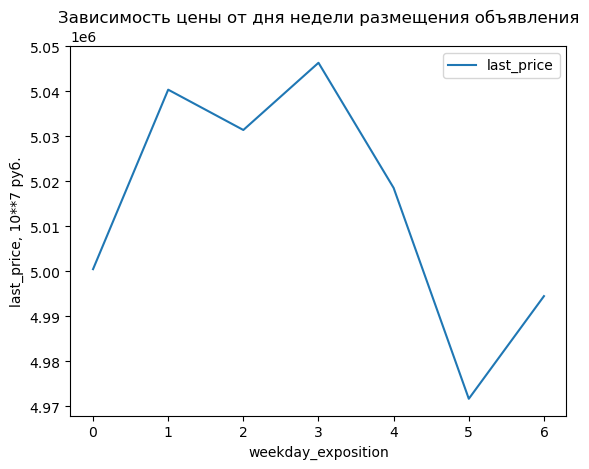

In [155]:
relation_last_price(df, 'weekday_exposition')
plt.title('Зависимость цены от дня недели размещения объявления', fontsize= 12)

,last_price
month_exposition,
1,4.959079e+06
2,4.966383e+06
3,5.077982e+06
4,5.063164e+06
5,4.975751e+06
6,4.825720e+06
7,4.912620e+06
8,4.988993e+06
9,5.195742e+06


Text(0.5, 1.0, 'Зависимость цены от месяца размещения объявления')

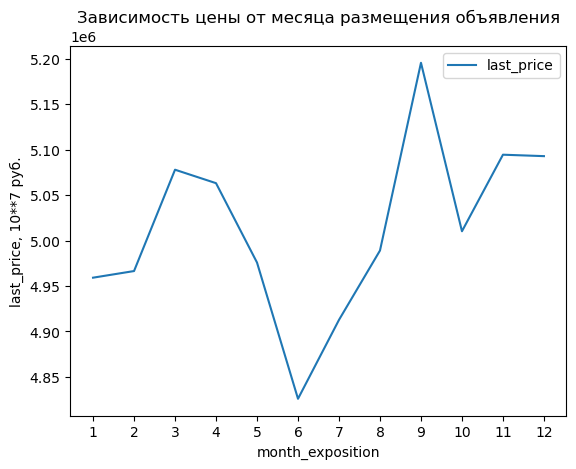

In [156]:
relation_last_price(df, 'month_exposition')
plt.title('Зависимость цены от месяца размещения объявления', fontsize= 12)

Как мы видим, стоимость продаж резко падала до 2016 года, и только в 2018 году начался рост.

В первую половину недели размещаются объявления с более высокой стоимостью,  пик приходится на четверг. 

В течание года на цену влияет сезонность: затишье с апреля до конца лета, максимальные - в сентябре и на конце года.
___

Построим тепловую карту корреляции по столбцу `last_price`, чтобы выявить параметры, которые оказывают наибольшее влияние на стоимость квартиры.


Наибольшее влияние на цену жилья оказывает метраж (и связанные с ним жилая площадь и  площадь кухни), далее идет количество комнат. Стоимость кв. метра я не рассматриваю, т.к. это расчетное значение.
___
Взуализируем зависимость цены от озвученных выше параметров (метраж и количество комнат).

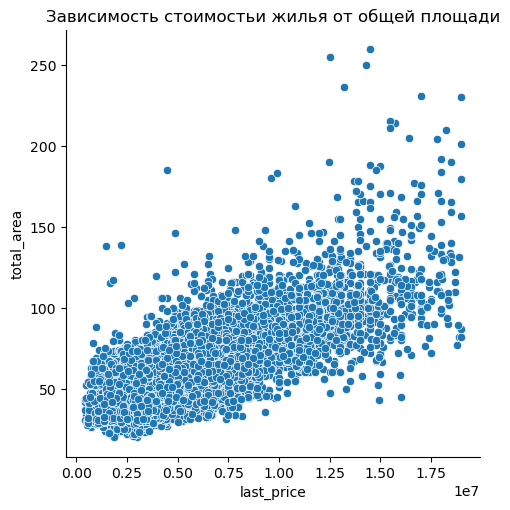

In [112]:
sns.relplot(x='last_price', y='total_area',data=df)
plt.title('Зависимость стоимостьи жилья от общей площади', fontsize= 12)
plt.show()

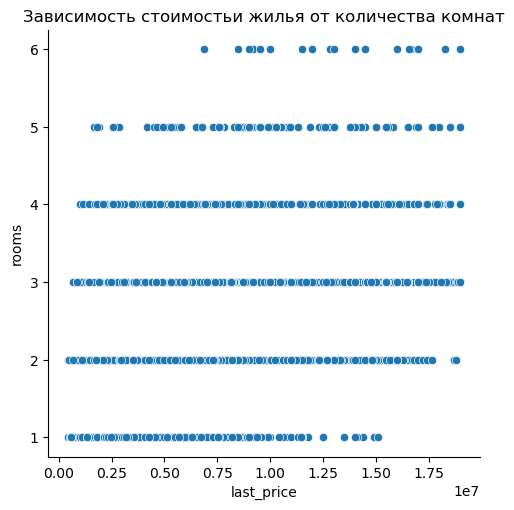

In [113]:
sns.relplot(x='last_price', y='rooms',data=df)
plt.title('Зависимость стоимостьи жилья от количества комнат', fontsize= 12)
plt.show()

Первая диаграмма рассеивания более четко показывает положительную корреляцию межлу ценой жилья и общей площадью. Вторая диаграмма, из-за того, что значений по оси Y очень мало (от 1 до 6 комнат), визуально не так прозрачна, но зависимость все же прослеживается.

Выявляем зависимоть стоимости жилья от этажа (первый, последний или другой) на основании медианного значения.

In [114]:
df.pivot_table(index='floor_type',values='last_price',  aggfunc='median').reset_index()

,floor_type,last_price
0,first,3750000.0
1,last,3950000.0
2,other,4599000.0


Стоимость жилья на крайних этажах ниже.
____
На основании произведенного анализа общий вывод такой: на стоимоть квартирир наибольшее влияние оказывает общая площадь, количество комнат и этаж.


### * анализируем объявления в разрезе населенных пунктов

In [115]:
df['locality_name'].value_counts()    

locality_name
Санкт-Петербург                               11450
поселок Мурино                                  421
поселок Шушары                                  389
Всеволожск                                      338
Колпино                                         300
                                              ...  
деревня Старополье                                1
поселок при железнодорожной станции Вещево        1
поселок Кингисеппский                             1
деревня Щеглово                                   1
поселок Дзержинского                              1
Name: count, Length: 306, dtype: int64

In [116]:
l_df = df[df.locality_name.isin(df.locality_name.value_counts().index[:10])] # топ-10 населенных пунктов по к-ву объявлений

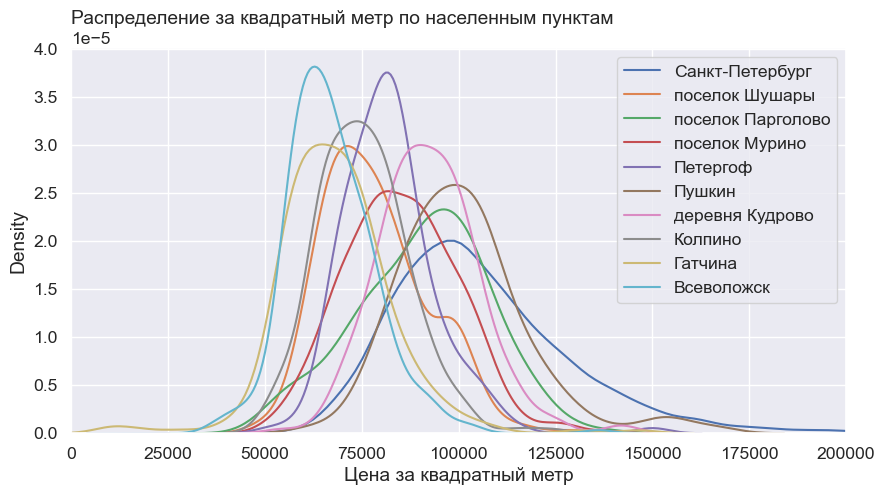

In [175]:
fig, ax = plt.subplots(figsize=(10, 5)) 

for locality in l_df.locality_name.unique():
    sns.kdeplot(l_df[l_df.locality_name == locality].price_to_m, label = locality)

plt.grid(True) # сетка
plt.legend(bbox_to_anchor = (1,1)) # положение легенды
plt.title('Распределение за квадратный метр по населенным пунктам', loc = 'left') # название графика
plt.xlabel('Цена за квадратный метр') # подпись оси x
plt.xlim((0,200000)) # ограничение значений оси X
plt.show()

In [118]:
display(l_df.pivot_table(index='locality_name', values='price_to_m',  aggfunc='mean')
        .sort_values(by='price_to_m')
        .round(2))

,price_to_m
locality_name,
Всеволожск,67150.31
Гатчина,68248.84
Колпино,75400.26
поселок Шушары,78496.91
Петергоф,82102.21
поселок Мурино,85176.74
поселок Парголово,90711.64
деревня Кудрово,92247.48
Пушкин,101077.99


Гатчина  и Всеволожск - города с самой низкой средней ценой за квадратный метр (порядка 68 000 рублей), самая высокая цена, впрочем, ожидаемо - в Санкт-Петербурге (106 000 руб.).

### * анализ предложений жилья в Санкт-Петербурге

In [176]:
# выделяем квартиры в Санкт_Петербурге
# cоздаем столбец с расстоянием до центра в километрах: округляем до целых значений. 

df['city_centers_nearest_km'] = df['city_centers_nearest'].div(1000).fillna(0).apply(np.ceil)

spb_df = df[df['locality'] == 'SPB']

spb_df.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,realty_type,price_to_m,floor_type,living_to_total_area,kitchen_to_total_area,locality,city_centers_nearest_km,weekday_exposition,month_exposition,year_exposition
20519,15,3770000.0,43.0,2017-05-17,1,2.75,25,16.5,9,False,False,False,12.5,1,Санкт-Петербург,54273.0,18766.0,0,NaN,1,736.0,168.0,flat,87674.418605,other,0.383721,0.290698,SPB,19.0,2,5,2017
4705,12,5330000.0,48.0,2016-04-07,2,2.65,24,26.1,12,False,False,False,8.7,1,Санкт-Петербург,15297.0,13279.0,0,NaN,1,1112.0,206.0,flat,111041.666667,other,0.543750,0.181250,SPB,14.0,3,4,2016
15247,7,5050000.0,55.0,2017-08-29,2,2.65,16,31.3,15,False,False,False,11.0,0,Санкт-Петербург,28036.0,13755.0,1,526.0,1,161.0,37.0,flat,91818.181818,other,0.569091,0.200000,SPB,14.0,1,8,2017


,price_to_m
city_centers_nearest_km,
0.0,112715.074249
1.0,119884.158882
2.0,125088.412027
3.0,113469.619079
4.0,113603.285739
5.0,126244.149315
6.0,126157.617495
7.0,126682.528257
8.0,124201.722786


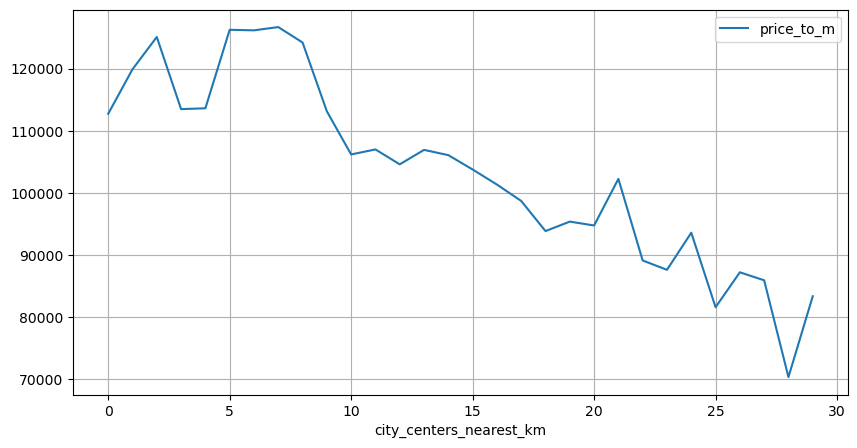

In [120]:
spb_df_pivot= spb_df.pivot_table(index = 'city_centers_nearest_km', values= 'price_to_m', aggfunc='mean')

display(spb_df_pivot.head(10))
spb_df_pivot.plot(figsize=(10,5), grid=True)
plt.show()

Определим самый центр (так называемая "центральная зона") в диаметре 7-ми километров.

### * анализ сегмента  квартир в центре Санкт_петербурга

In [121]:
spb_df_center = spb_df.query('city_centers_nearest_km == 7')
spb_df_center.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,realty_type,price_to_m,floor_type,living_to_total_area,kitchen_to_total_area,locality,city_centers_nearest_km
15132,8,5990000.0,43.0,2016-02-05T00:00:00,1,2.65,16,16.5,3,False,False,False,13.00,0,Санкт-Петербург,30215.0,6255.0,0,NaN,1,113.0,144.0,flat,139302.325581,other,0.383721,0.302326,SPB,7.0
5604,18,10990000.0,100.0,2018-09-17T00:00:00,4,2.65,5,68.0,2,False,False,False,14.00,0,Санкт-Петербург,26666.0,6171.0,1,547.0,1,806.0,92.0,flat,109900.000000,other,0.680000,0.140000,SPB,7.0
15584,15,3900000.0,33.5,2018-10-11T00:00:00,1,2.60,9,20.5,5,False,False,False,6.00,0,Санкт-Петербург,29278.0,6061.0,1,395.0,1,371.0,6.0,flat,116417.910448,other,0.611940,0.179104,SPB,7.0
9417,18,11300000.0,73.7,2017-09-27T00:00:00,2,2.65,12,45.8,9,False,False,False,8.19,1,Санкт-Петербург,16285.0,6303.0,1,156.0,0,NaN,239.0,flat,153324.287653,other,0.621438,0.111126,SPB,7.0
23583,6,3200000.0,32.0,2017-08-07T00:00:00,1,2.55,5,18.0,1,False,False,False,5.00,0,Санкт-Петербург,30838.0,6044.0,0,NaN,1,924.0,69.0,flat,100000.000000,first,0.562500,0.156250,SPB,7.0


Количество пропусков: 0
Тип данных: float64
Детали: count    225.00
mean      63.73
std       28.92
min       20.00
25%       44.00
50%       57.10
75%       73.90
max      255.00
Name: total_area, dtype: float64


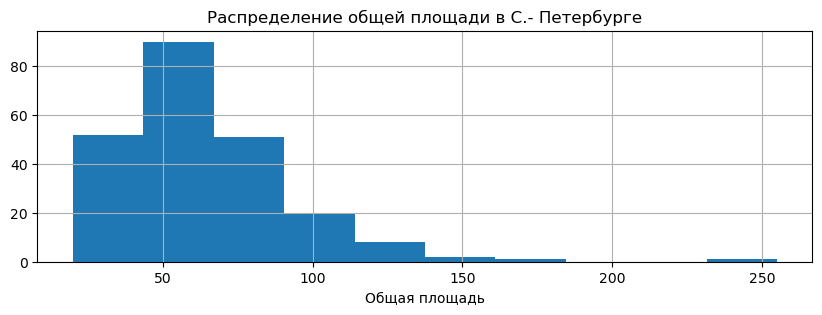

In [122]:
describe_all(spb_df_center, 'total_area')
build_hist(spb_df_center.total_area, 'Общая площадь','Распределение общей площади в С.- Петербурге')

Средняя площадь квартир  -  в районе 50-ти метров, но есть и больше, конечно.

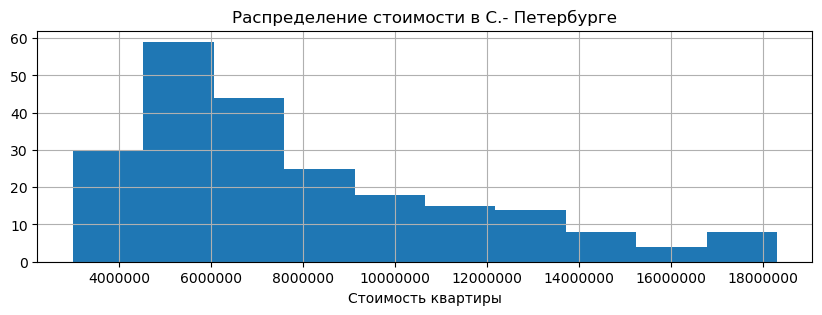

In [123]:
build_hist(spb_df_center.last_price, 'Стоимость квартиры','Распределение стоимости в С.- Петербурге')

БОльшая часть квартир находится в диапазоне от 5-ти до 7-ми млн. рублей, но немало квартир с бОльшей стоимостью.

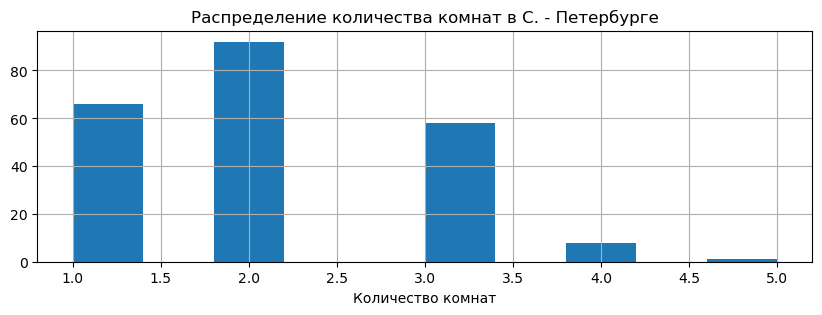

In [124]:
build_hist(spb_df_center.rooms, 'Количество комнат','Распределение количества комнат в С. - Петербурге')

Как и по общей таблице, в основном представлены квартиры до трех комнат.

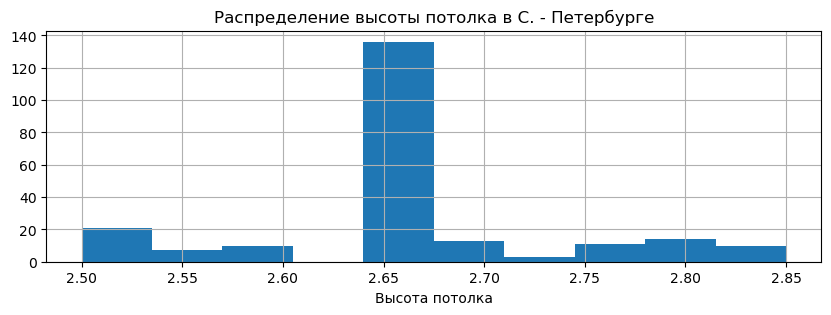

In [125]:
build_hist(spb_df_center.ceiling_height, 'Высота потолка','Распределение высоты потолка в С. - Петербурге')

Потолки высокие.

Наибольшее влияние на цену недвижимости в центральной части Санкт-Петербурга оказывает метраж (и связанные с ним жилая площадь и площадь кухни), этажность здания и этаж.

In [177]:
plt.figure(figsize=(10,10))  # строим тепловую карту коррелияции 
upp_mat = np.triu(spb_df_center.corr())
sns.heatmap(spb_df_center.corr()[['last_price']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.show()

ValueError: could not convert string to float: '2017-05-29T00:00:00'

<Figure size 1000x1000 with 0 Axes>

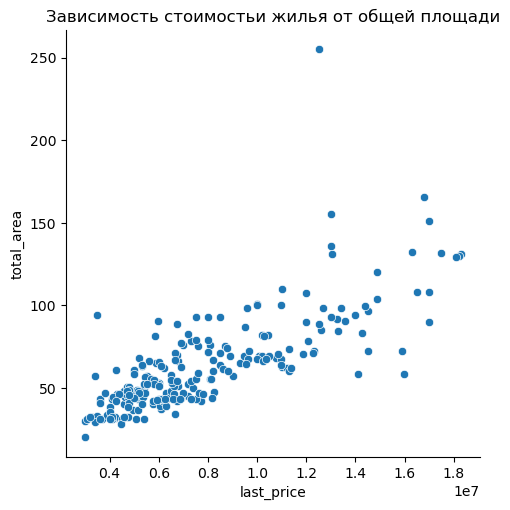

In [127]:
sns.relplot(x='last_price', y='total_area',data=spb_df_center)
plt.title('Зависимость стоимостьи жилья от общей площади', fontsize= 12)
plt.show()

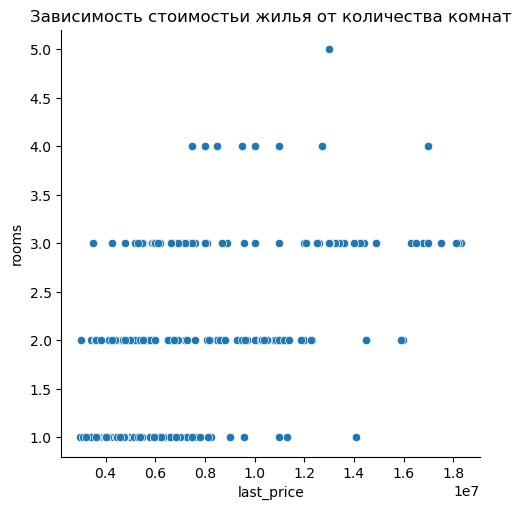

In [128]:
sns.relplot(x='last_price', y='rooms',data=spb_df_center)
plt.title('Зависимость стоимостьи жилья от количества комнат', fontsize= 12)
plt.show()

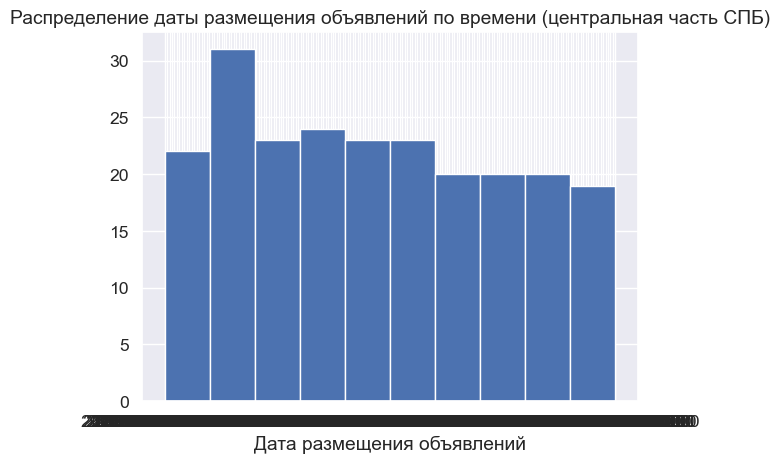

In [182]:
plt.hist(spb_df_center['first_day_exposition'])
plt.xlabel('Дата размещения объявлений')
plt.title('Распределение даты размещения объявлений по времени (центральная часть СПБ)')
plt.show()

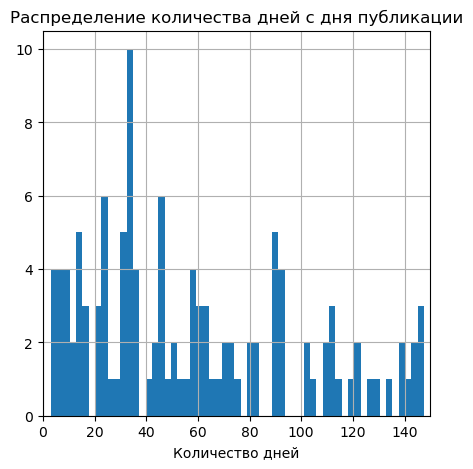

In [132]:
plt.figure(figsize=(5,5))    
spb_df_center.days_exposition.hist(bins=500)
plt.xlabel('Количество дней')
plt.title('Распределение количества дней с дня публикации')
plt.xlim(0,150)
plt.show()

Тенденция к сокращению сроков продажи одинакова для всех.
Причем, у свежих объявлений больше шансов. 

Дольше всего продается недвижимость, объявления о продаже которых разместили в 2014 году. Картина резко изменилась в 2017 году, видимо появился высоки спрос.
В 2019 предложение находит своего покупателя в среднем за месяц. 
По сравнениню в общим датасетом, можно выделить следующие особенности приоритетности параметров, влияющих на стоимость жилья в центре Санкт-Птеребурга:
1. метраж важен, но его корреляция со стоимостью ниже, так же как и требования к соотношению площадей (жилой и кухни) к общей;
2. повышается внимание к этажу расположения квартиры и количеству балконов;
3. влияние близости к центру на стоимость более явное;
3. бОльший интерес проявляется к количеству фотографий;

## Общий вывод

Нами был изучен и проанализирован датасет объявлений о продаже недвижимости в Санкт-Петербурге и окрестностях, размещенных за период с конца 2014-го  по середину 2019-го года.

На продажу выставлена недвижимость разного ценового диапозона: от квартир за 1 млн. рублей до элитного жилья на несколько сотен млн. рублей.

Перечислим основные факторы влияния на стоимость (в порядке убывания):
1. общая площадь;
2. соотношение площади кухни и жилой площади к общей;
3. количество комнат;
4. высота потолка;
4. этаж (последний, другой);
5. наличие парка с водоемом в радиусе 3-х км.

При изучении объявлений о продаже элитного жилья в центре Санкт-Птербурга выявлено, что факторы примерно такие же:
1. общая площадь; 
2. соотношение площади кухни чуть менее важно,  в отличие от соотношения жилой площади к общей;
4. количество комнат;
3. появляется больше требований к эстетике: вид из окна (последние этажи стоят дороже) и наличию парка рядом.